In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import  Image
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
print('libraries imported !')


libraries imported !


In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape        , train_labels.shape
# Data shape

((60000, 28, 28), (60000,))

In [4]:
train_labels[0:8]
#image labels

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [5]:
def image_show(train_image , train_label ,number):
    plt.imshow(train_images[number])
    plt.title(train_labels[number])
    # plt.xlabel(train_labels[number])
    # plt.axis('off')
    plt.show()

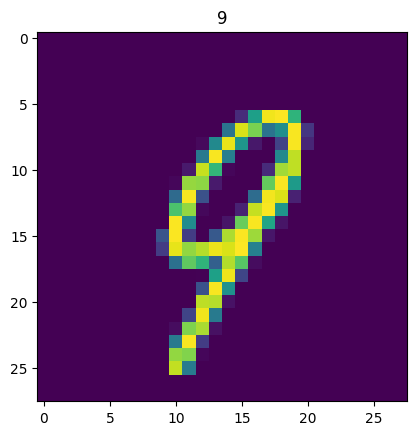

In [6]:
image_show(train_image=train_images,train_label=train_labels,number=22)

In [7]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
# Expand dimensions to add a channel (for grayscale images)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [9]:
train_images.shape     ,    test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
train_images[0].shape

(28, 28, 1)

In [11]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
train_labels.shape
### Numbers are 0 --- 9

(60000, 10)

In [13]:
# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  #conv2D layer
model.add(layers.MaxPooling2D((2, 2)))   # pooling layer

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())  # Flatten layer

model.add(layers.Dense(64, activation='relu'))    #Fully Connected ANN Dense or Hidden layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)             

In [18]:
train_images.shape,train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [14]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


750/750 [==============================] - 29s 33ms/step - loss: 0.2209 - accuracy: 0.9307 - val_loss: 0.0748 - val_accuracy: 0.9788
Epoch 2/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0584 - val_accuracy: 0.9836
Epoch 3/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0419 - val_accuracy: 0.9879
Epoch 4/5
750/750 [==============================] - 23s 31ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0394 - val_accuracy: 0.9884
Epoch 5/5
750/750 [==============================] - 23s 30ms/step - loss: 0.0235 - accuracy: 0.9920 - val_loss: 0.0396 - val_accuracy: 0.9893


In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc*100}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0301 - accuracy: 0.9895
Test accuracy: 98.94999861717224


In [16]:
# Make predictions on new data
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [17]:
np.argmax(predictions,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)